<a href="https://colab.research.google.com/github/TillFalko/AI-Author/blob/master/Rock_Paper_Scissors_Football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

# Team dict | manchester > fc | fc > manama | manama > Manchester
id2team = {
    '0': 'Manchester City',
    '1': 'FC Augsburg',
    '2': 'Manama Club'
}
team2id = {
    'Manchester City': '0',
    'FC Augsburg': '1',
    'Manama Club': '2'
}


# DATA : team_0 | team_1 | outcome (0/1)
data = torch.tensor([
  [0, 1, 0],
  [1, 2, 0],
  [2, 0, 0],
  [1, 0, 1],
  [2, 1, 1],
  [0, 2, 1]
])

data_shuffled = data[torch.randperm(data.shape[0])]

def data_generator():
  while True:
    for example in data:
      yield example
gen = data_generator()

In [ ]:
embed_depth = 2
class Netz(nn.Module):
  def __init__(self):
    super().__init__()
    self.embedding = nn.Embedding(len(id2team.keys()), embed_depth) # Depth of 2
    self.bilinear = nn.Bilinear(
        in1_features=embed_depth,
        in2_features=embed_depth,
        out_features=2
    )
    self.activation = nn.Sigmoid()

  def forward(self, team_0 : int, team_1 : int):
    embed_0 = self.embedding(team_0)
    embed_1 = self.embedding(team_1)
    t = self.bilinear(embed_0, embed_1)
    t = self.activation(t)
    return t


CrossEntropyLoss wants input as a list of probabilities for each class/team

In [ ]:
n = Netz()
losses = []
optimizer = optim.Adam(n.parameters(), lr=0.01)
#optimizer = optim.SGD(n.parameters(), lr=0.001, momentum=1)
loss = nn.CrossEntropyLoss()

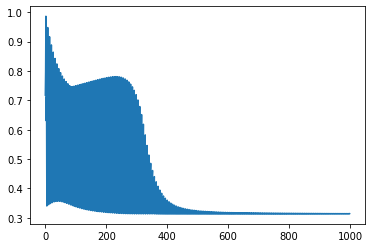

In [ ]:
# no batch
for i in range(1000):
    n.zero_grad()
    team_0, team_1, result = next(gen)
    prediction = n(team_0, team_1)
    prediction = prediction.view(1, -1)
    result = result.view(1)
    #print(team_0, team_1)
    #print(prediction)
    #print(result)
    l = loss(prediction, result)
    losses.append(l)
    l.backward()
    optimizer.step()
plt.plot(losses)
plt.show()

In [ ]:
print(n.embedding(torch.tensor(0)))
print(n.embedding(torch.tensor(1)))
print(n.embedding(torch.tensor(2)))

tensor([ 0.3191, -2.4043], grad_fn=<EmbeddingBackward>)
tensor([-4.1617,  0.2266], grad_fn=<EmbeddingBackward>)
tensor([2.9348, 2.1388], grad_fn=<EmbeddingBackward>)


In [ ]:
n(torch.tensor(0), torch.tensor(2))

tensor([4.1273e-04, 9.9979e-01], grad_fn=<SigmoidBackward>)